In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import matplotlib.patches as mpatches

In [ ]:
educ_labels = pd.read_csv("data/educ-labels.csv")
race_labels = pd.read_csv("data/race-labels.csv")
marst_labels = pd.read_csv("data/marst-labels.csv")
emp_labels = pd.read_csv("data/empstat-labels.csv")
occ2010_labels = pd.read_csv("data/occ2010_labels.csv")
sex_labels = {1: 'Male', 2: 'Female', 9: 'NIU'}

In [ ]:
df_asec = pd.read_csv("data/df_asec_clean.csv")

In [ ]:
# let's focus on the relevant columns for the EDA
#columns_to_keep = ['YEAR', 'AGE', 'SEX', 'RACE', 'MARST', 'EMPSTAT', 'OCC', 'OCC2010', 'EDUC', 'OCCLY', 'OCC10LY', 'INCWAGE', 'WEIGHT', 'OCC_FIELD','OCC_FIELD_LY', 'RACE_GROUP']
columns_to_keep = ['YEAR', 'AGE', 'SEX', 'RACE', 'MARST', 'EMPSTAT', 'OCC2010', 'EDUC', 'OCC10LY', 'INCWAGE', 'WEIGHT', 'OCC_FIELD', 'OCC_FIELD_LY', 'RACE_GROUP']
df = df_asec[columns_to_keep].copy()

In [ ]:
occs_ly_unique = set(df.OCC_FIELD_LY.unique())
occs_unique = set(df.OCC_FIELD.unique())

# Calculate the set difference
difference = occs_ly_unique - occs_unique

print("Difference between OCC_FIELD_LY and OCC_FIELD:")
print(difference)

Difference between OCC_FIELD_LY and OCC_FIELD:
{'Military', 'No Occupation'}


The data contains infomation about people who are in the labor force and are currently employed (OCC10). And we see that some of these people used to be unemployed or in the military (OCC10LY).

In [ ]:
year_start = 2000
year_end = 2023 + 1 # up to 2023
years = [i for i in range(year_start, year_end)]

In [ ]:
# Create a new column to indicate occupation change
df['ChangeOcc'] = (df['OCC2010'] != df['OCC10LY']).astype(int)
# Multiply each change in occupation by asec weight
df["ChangeOccWT"] = df["ChangeOcc"] * df["WEIGHT"]

In [ ]:
"""
# Group the data by year and calculate the proportion of individuals changing occupations each year
occupation_change_by_year = df.groupby('YEAR')['ChangeOcc'].mean()

# Plot the line plot
plt.figure(figsize=(10, 6))
occupation_change_by_year.plot(marker='o', color='b')
plt.title('Proportion of Individuals Changing Occupations Over Time')
plt.xlabel('Year')
plt.ylabel('Proportion of Occupational Changes')
plt.ylim(0, 0.2)
plt.grid(True)
plt.show()
"""

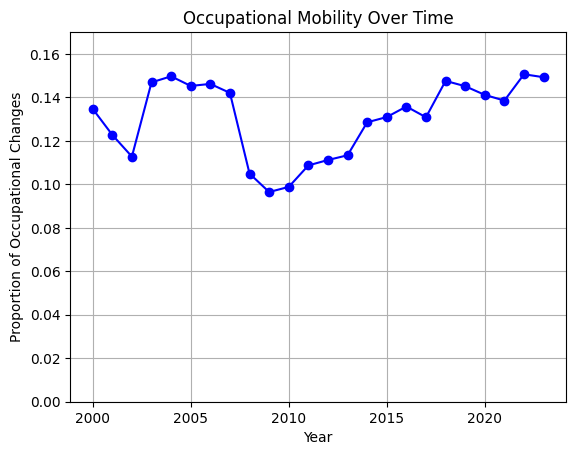

In [ ]:
# Group the data by year and calculate the weighted proportion of individuals changing occupations each year
occupation_change_by_year = df.groupby('YEAR')['ChangeOccWT'].sum() / df.groupby('YEAR')['WEIGHT'].sum()

# Plot the line plot
#plt.figure(figsize=(10, 6))
occupation_change_by_year.plot(marker='o', color='b')
plt.title('Occupational Mobility Over Time')
plt.xlabel('Year')
plt.ylabel('Proportion of Occupational Changes')
plt.ylim(0, 0.17)
plt.grid(True)
plt.show()

In [ ]:
"""
def plot_occupation_change_by_variable(df, variable, xlabel=None, labels_df=None):
    weight_col='WEIGHT'
    #figsize=(8, 4)
    color='g'
    # Calculate weighted proportion of individuals changing occupations for each category of the variable
    occupation_change_by_variable = df.groupby(variable)['ChangeOccWT'].sum() / df.groupby(variable)[weight_col].sum()

    # If labels are provided, set index labels
    if labels_df is not None:
        occupation_change_by_variable.index = labels_df.set_index('Code').loc[occupation_change_by_variable.index]['Label']

    # Order by proportions
    occupation_change_by_variable = occupation_change_by_variable.sort_values(ascending=False)

    # Plot the bar chart
    #plt.figure(figsize=figsize)
    occupation_change_by_variable.plot(kind='bar', color=color)
    plt.title(f'Weighted Proportion of Occupational Changes by {xlabel}')
    plt.xlabel(xlabel)
    plt.ylabel('Proportion of Occupational Changes')
    plt.xticks(rotation=80)
    plt.grid(axis='y')
    plt.show()
"""

# Occupational Mobility by Variables

In [ ]:
def plot_occupation_change_by_variable(df, variable, xlabel=None, labels_df=None, color='g', ax=None):
    weight_col='WEIGHT'
    # Calculate weighted proportion of individuals changing occupations for each category of the variable
    occupation_change_by_variable = df.groupby(variable)['ChangeOccWT'].sum() / df.groupby(variable)[weight_col].sum()

    # If labels are provided, set index labels
    if labels_df is not None:
        occupation_change_by_variable.index = labels_df.set_index('Code').loc[occupation_change_by_variable.index]['Label']

    # Order by proportions
    occupation_change_by_variable = occupation_change_by_variable.sort_values(ascending=False)

    # Plot the bar chart
    if ax is None:
        plt.figure(figsize=(8, 4))
        ax = plt.gca()
    occupation_change_by_variable.plot(kind='bar', color=color, ax=ax)
    ax.set_title(f'Occupational Mobility Rate by {xlabel}')
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Occupational Mobility Rate')
    ax.set_xticklabels(occupation_change_by_variable.index, rotation=80)
    ax.grid(axis='y')

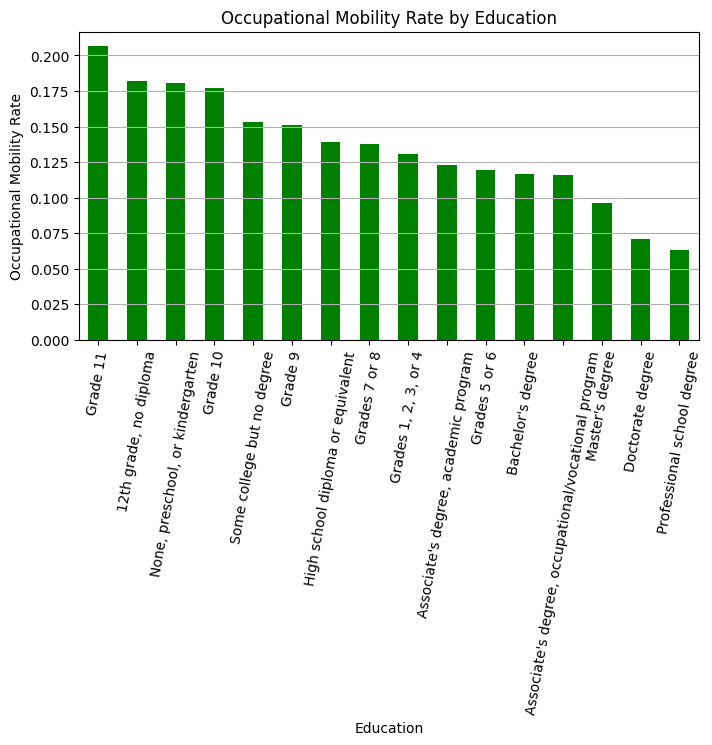

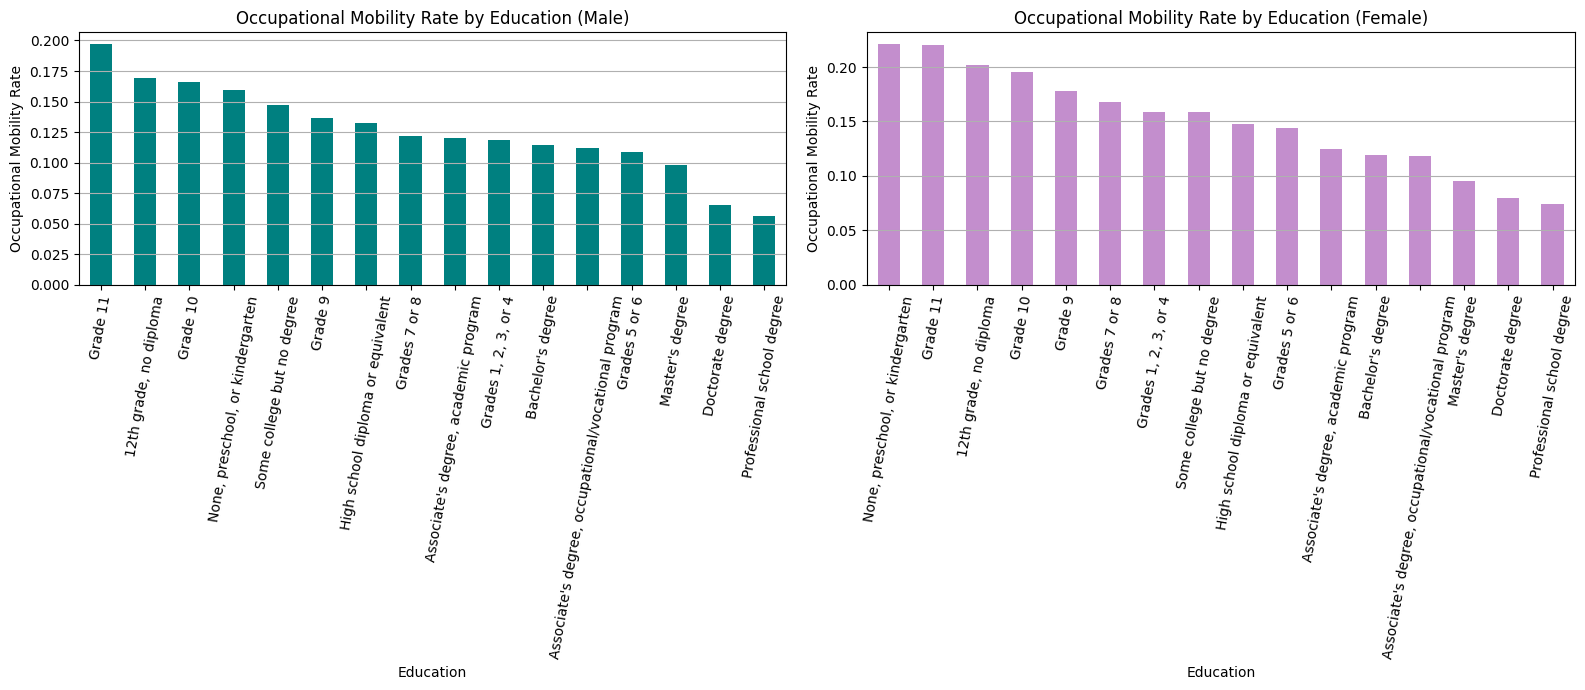

In [ ]:
# Plot for the entire dataset
plot_occupation_change_by_variable(df, 'EDUC', 'Education', educ_labels, color='g')
plt.show()

# Plot for males and females separately side by side
fig, axs = plt.subplots(1, 2, figsize=(16, 7))

plot_occupation_change_by_variable(df[df['SEX'] == 1], 'EDUC', 'Education', educ_labels, ax=axs[0], color='teal')
axs[0].set_title('Occupational Mobility Rate by Education (Male)')

plot_occupation_change_by_variable(df[df['SEX'] == 2], 'EDUC', 'Education', educ_labels, ax=axs[1], color='#c38ecd')
axs[1].set_title('Occupational Mobility Rate by Education (Female)')

plt.tight_layout()
plt.show()

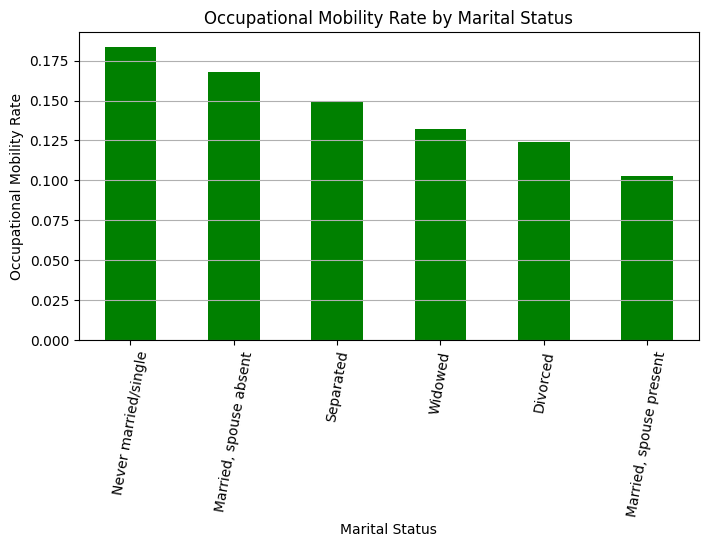

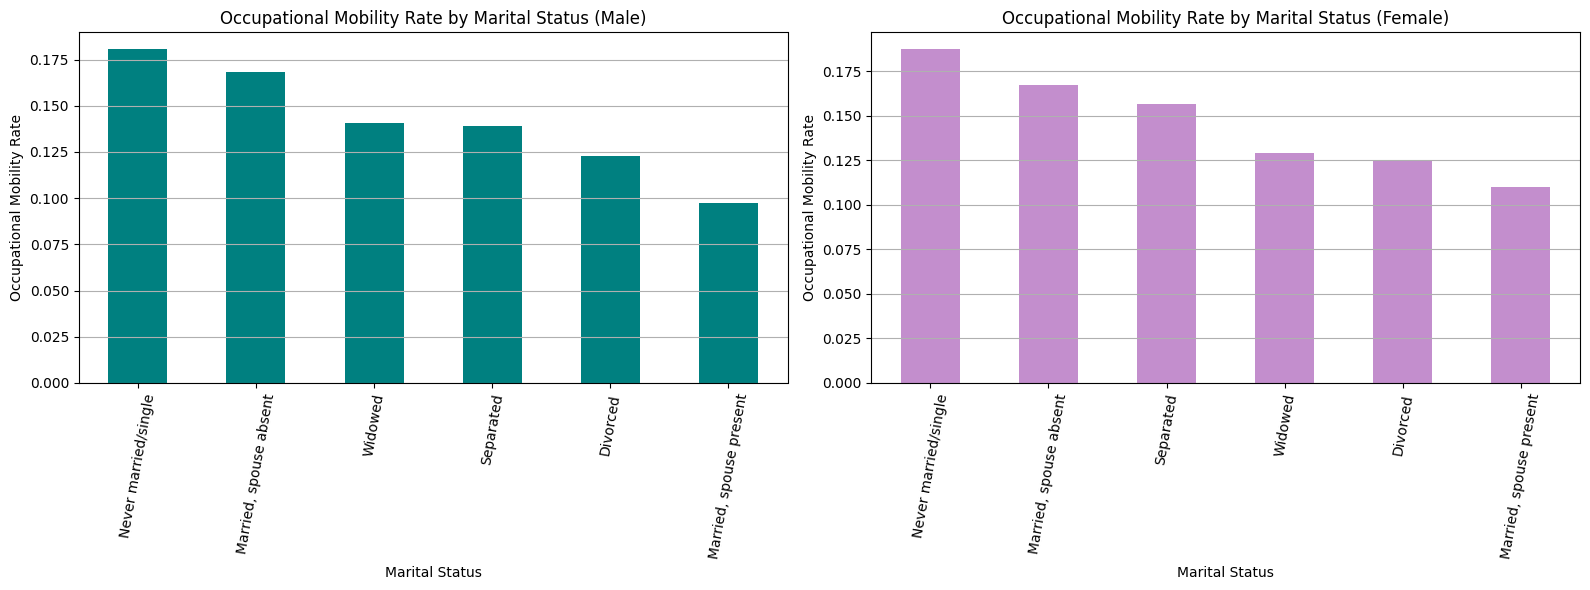

In [ ]:
# Plot for the entire dataset
plot_occupation_change_by_variable(df, 'MARST', 'Marital Status', marst_labels, color='g')
plt.title('Occupational Mobility Rate by Marital Status')
plt.show()

# Plot for males and females separately side by side
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

plot_occupation_change_by_variable(df[df['SEX'] == 1], 'MARST', 'Marital Status', marst_labels, ax=axs[0], color='teal')
axs[0].set_title('Occupational Mobility Rate by Marital Status (Male)')

plot_occupation_change_by_variable(df[df['SEX'] == 2], 'MARST', 'Marital Status', marst_labels, ax=axs[1], color='#c38ecd')
axs[1].set_title('Occupational Mobility Rate by Marital Status (Female)')

plt.tight_layout()
plt.show()


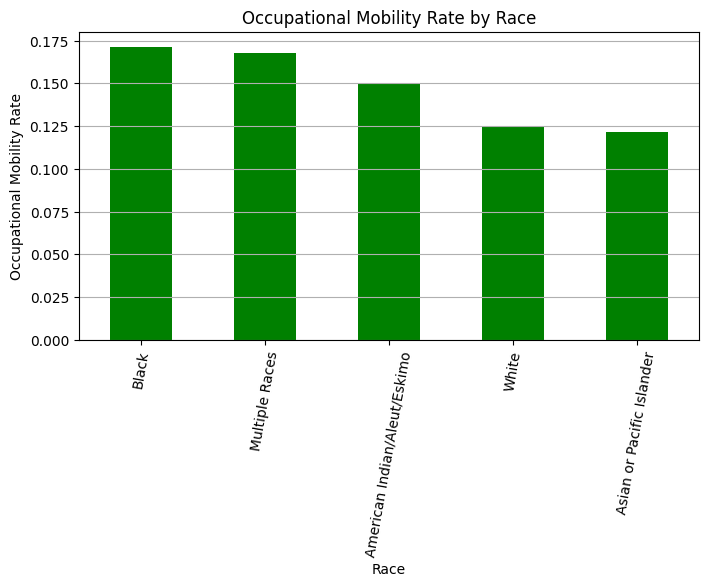

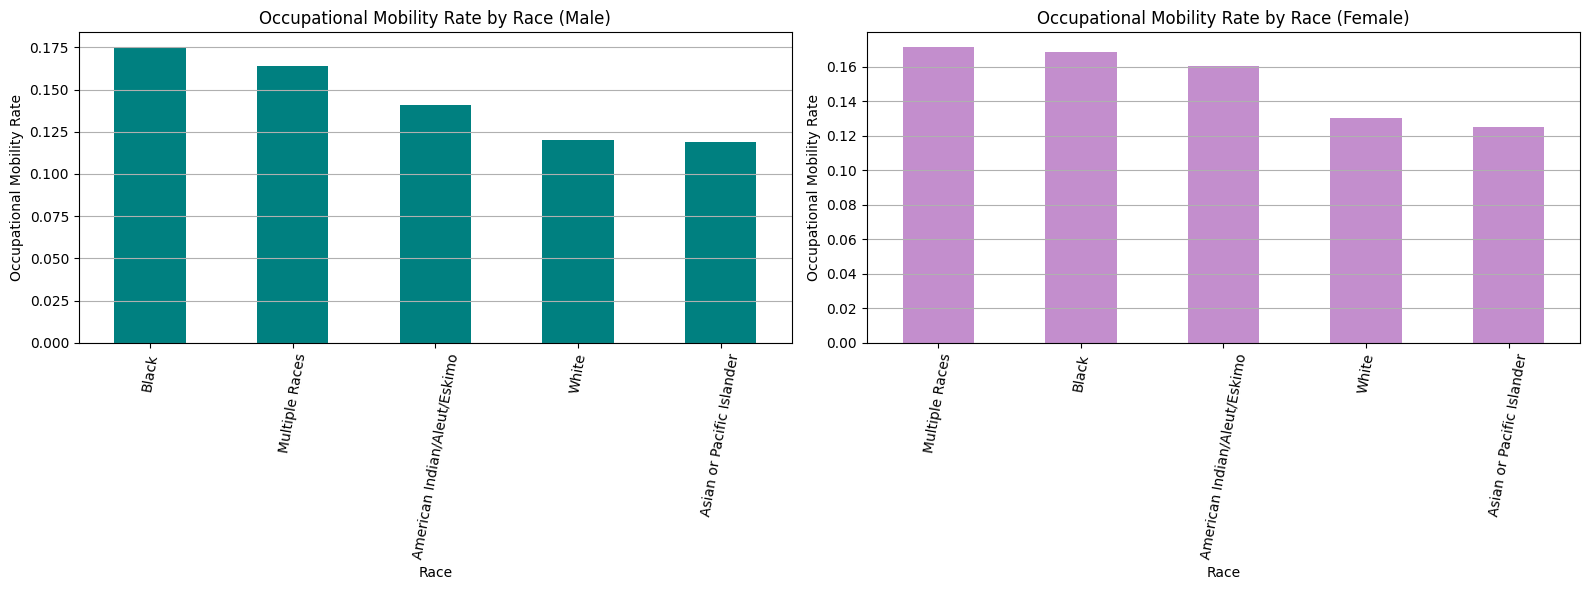

In [ ]:
# Plot for the entire dataset
plot_occupation_change_by_variable(df, 'RACE_GROUP', 'Race', color='g')
plt.title('Occupational Mobility Rate by Race')
plt.show()

# Plot for males and females separately side by side
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

plot_occupation_change_by_variable(df[df['SEX'] == 1], 'RACE_GROUP', 'Race', ax=axs[0], color='teal')
axs[0].set_title('Occupational Mobility Rate by Race (Male)')

plot_occupation_change_by_variable(df[df['SEX'] == 2], 'RACE_GROUP', 'Race', ax=axs[1], color='#c38ecd')
axs[1].set_title('Occupational Mobility Rate by Race (Female)')

plt.tight_layout()
plt.show()


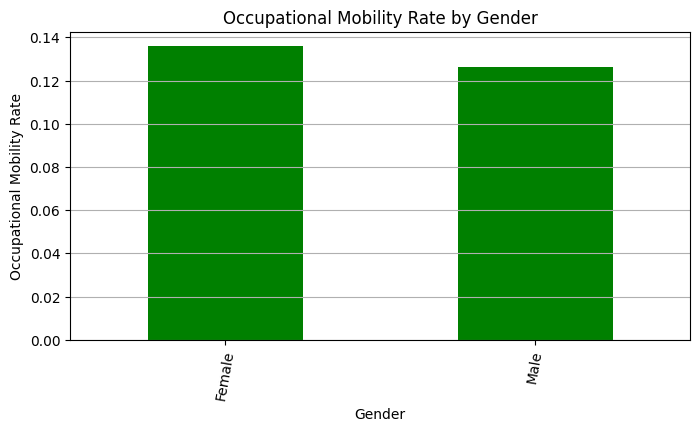

In [ ]:
plot_occupation_change_by_variable(df, 'SEX', 'Gender', labels_df=pd.DataFrame(list(sex_labels.items()), columns=['Code', 'Label']))

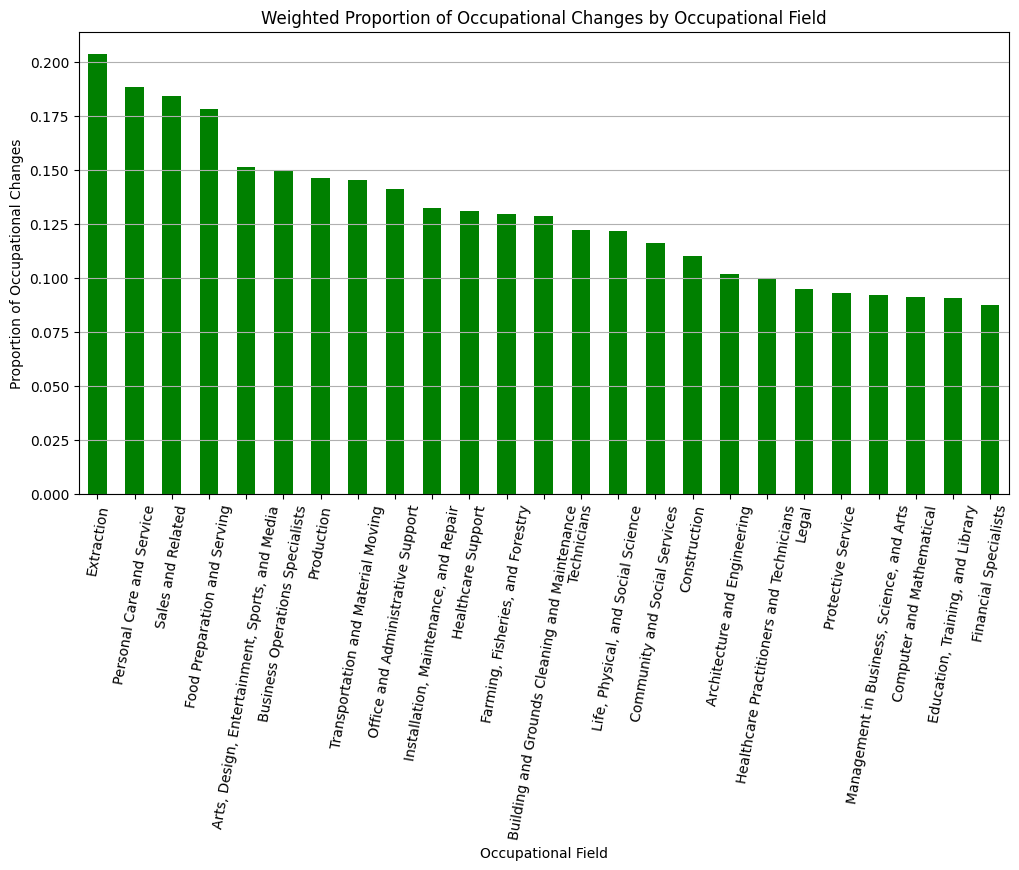

In [ ]:
plot_occupation_change_by_variable(df, 'OCC_FIELD', 'Occupational Field')

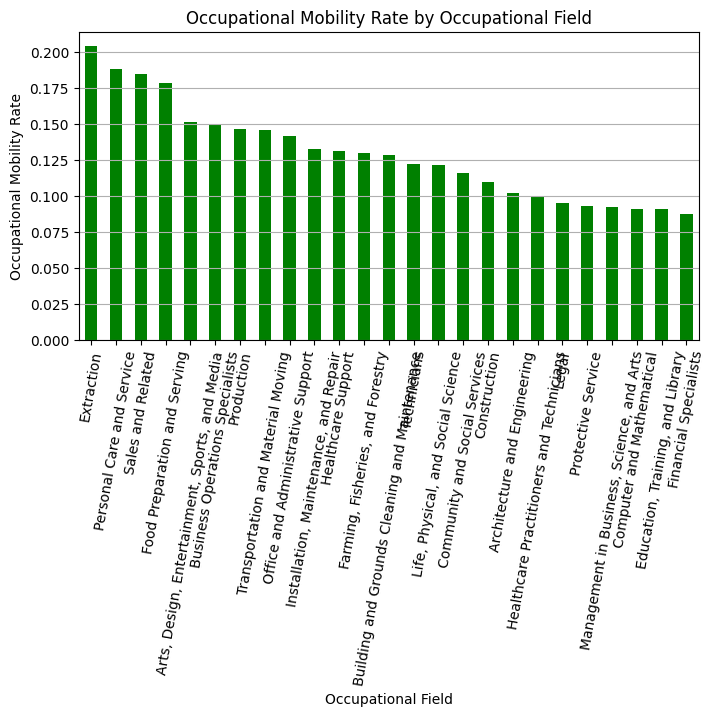

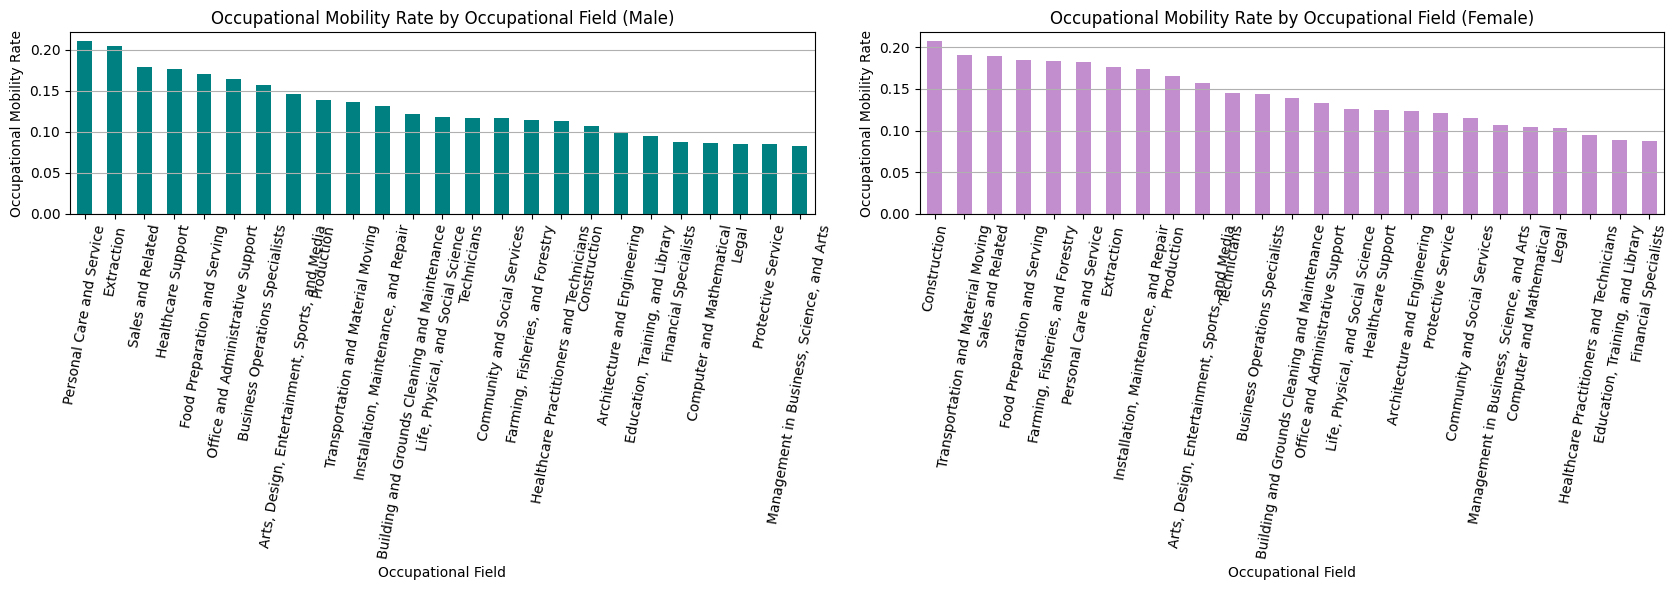

In [ ]:
# Plot for the entire dataset
plot_occupation_change_by_variable(df, 'OCC_FIELD', 'Occupational Field', color='g')
plt.title('Occupational Mobility Rate by Occupational Field')
plt.show()

# Plot for males and females separately side by side
fig, axs = plt.subplots(1, 2, figsize=(17, 6))

plot_occupation_change_by_variable(df[df['SEX'] == 1], 'OCC_FIELD', 'Occupational Field', ax=axs[0], color='teal')
axs[0].set_title('Occupational Mobility Rate by Occupational Field (Male)')

plot_occupation_change_by_variable(df[df['SEX'] == 2], 'OCC_FIELD', 'Occupational Field', ax=axs[1], color='#c38ecd')
axs[1].set_title('Occupational Mobility Rate by Occupational Field (Female)')

plt.tight_layout()
plt.show()

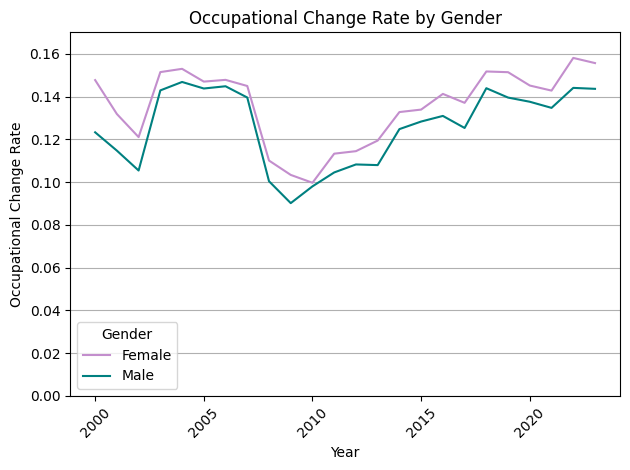

In [ ]:
df['SEX_Label'] = df['SEX'].map(sex_labels)

occupation_change_by_gender = df.groupby(['YEAR', 'SEX_Label'])['ChangeOccWT'].sum().unstack() / df.groupby(['YEAR', 'SEX_Label'])['WEIGHT'].sum().unstack()

#plt.figure(figsize=(8, 6))

# Plot lines for Female
sns.lineplot(data=occupation_change_by_gender.reset_index(), x='YEAR', y='Female', color='#c38ecd', label='Female')

# Plot lines for Male
sns.lineplot(data=occupation_change_by_gender.reset_index(), x='YEAR', y='Male', color='teal', label='Male')

plt.title('Occupational Change Rate by Gender')
plt.xlabel('Year')
plt.ylabel('Occupational Change Rate')
plt.xticks(rotation=45)
plt.ylim(0, 0.17)
plt.legend(title='Gender')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# Occupational Mobility by Income

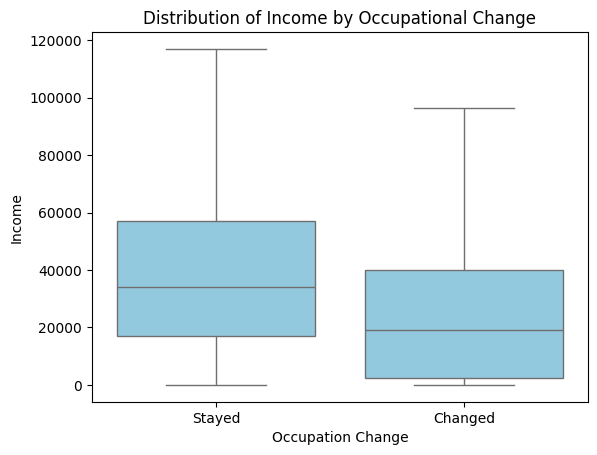

In [ ]:
# Plot the distribution of income for individuals who changed their occupation and those who stayed
#plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='ChangeOcc', y='INCWAGE', color='skyblue', showfliers=False)
plt.title('Distribution of Income by Occupational Change')
plt.xlabel('Occupation Change')
plt.ylabel('Income')
plt.xticks(ticks=[0, 1], labels=['Stayed', 'Changed'])
plt.show()


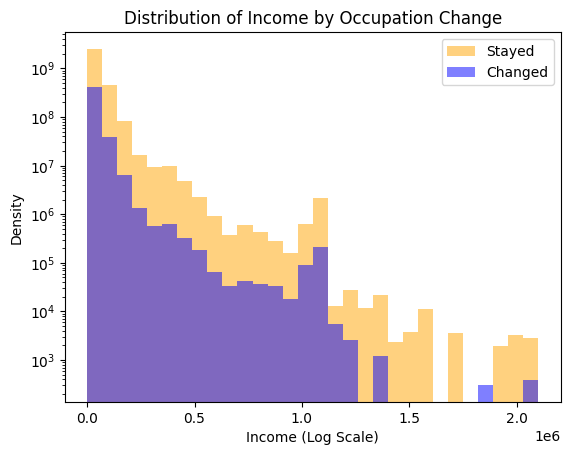

In [ ]:
# Filter individuals who have changed their occupation
changed_occupation = df[df['ChangeOcc'] == 1]
# Filter individuals who have not changed their occupation
unchanged_occupation = df[df['ChangeOcc'] == 0]

# Plot histograms for income of individuals who have changed their occupation
plt.hist(unchanged_occupation['INCWAGE'], bins=30, weights=unchanged_occupation['WEIGHT'], alpha=0.5, color='orange', label='Stayed', log=True)

# Plot histograms for income of individuals who have not changed their occupation
plt.hist(changed_occupation['INCWAGE'], bins=30, weights=changed_occupation['WEIGHT'], alpha=0.5, color='blue', label='Changed', log=True)
plt.xlabel('Income (Log Scale)')
plt.ylabel('Density')
plt.title('Distribution of Income by Occupation Change')
plt.legend()
plt.show()

In [ ]:
# Filter individuals who have changed their occupation and are Male
changed_occupation_male = df[(df['ChangeOcc'] == 1) & (df['SEX'] == 1)]
# Filter individuals who have not changed their occupation and are Male
unchanged_occupation_male = df[(df['ChangeOcc'] == 0) & (df['SEX'] == 1)]

# Filter individuals who have changed their occupation and are Female
changed_occupation_female = df[(df['ChangeOcc'] == 1) & (df['SEX'] == 2)]
# Filter individuals who have not changed their occupation and are Female
unchanged_occupation_female = df[(df['ChangeOcc'] == 0) & (df['SEX'] == 2)]

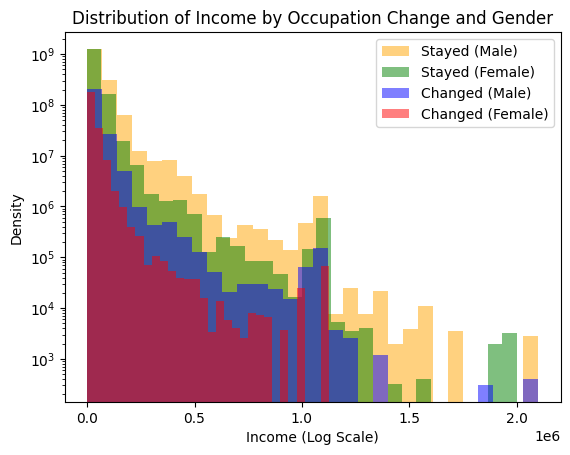

In [ ]:
# Plot histograms for income
plt.hist(unchanged_occupation_male['INCWAGE'], bins=30, weights=unchanged_occupation_male['WEIGHT'], alpha=0.5, color='orange', label='Stayed (Male)', log=True)
plt.hist(unchanged_occupation_female['INCWAGE'], bins=30, weights=unchanged_occupation_female['WEIGHT'], alpha=0.5, color='green', label='Stayed (Female)', log=True)
plt.hist(changed_occupation_male['INCWAGE'], bins=30, weights=changed_occupation_male['WEIGHT'], alpha=0.5, color='blue', label='Changed (Male)', log=True)
plt.hist(changed_occupation_female['INCWAGE'], bins=30, weights=changed_occupation_female['WEIGHT'], alpha=0.5, color='red', label='Changed (Female)', log=True)

plt.xlabel('Income (Log Scale)')
plt.ylabel('Density')
plt.title('Distribution of Income by Occupation Change and Gender')
plt.legend()
plt.show()

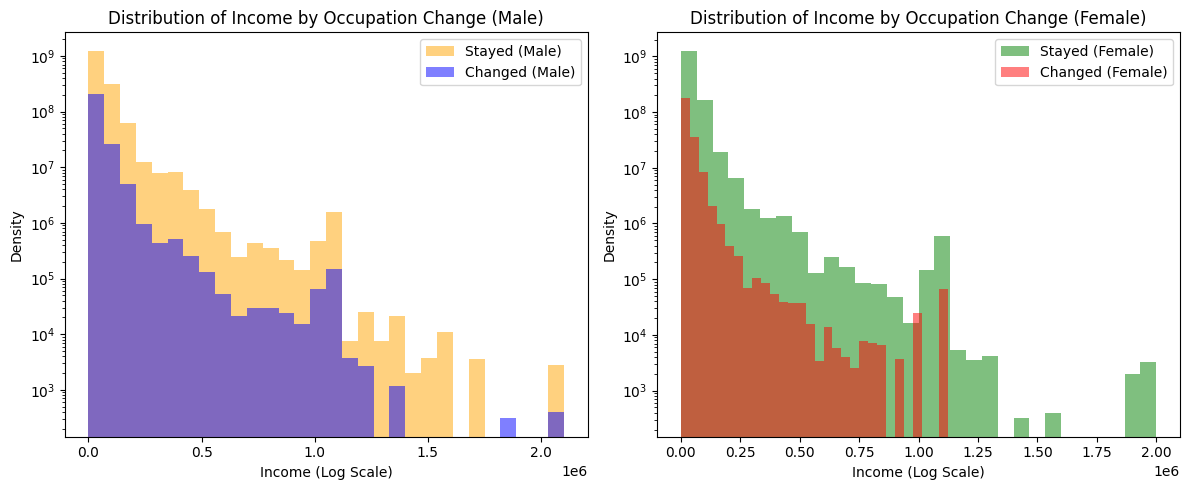

In [ ]:
# Set up figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot for males
axs[0].hist(unchanged_occupation_male['INCWAGE'], bins=30, weights=unchanged_occupation_male['WEIGHT'], alpha=0.5, color='orange', label='Stayed (Male)', log=True)
axs[0].hist(changed_occupation_male['INCWAGE'], bins=30, weights=changed_occupation_male['WEIGHT'], alpha=0.5, color='blue', label='Changed (Male)', log=True)
axs[0].set_xlabel('Income (Log Scale)')
axs[0].set_ylabel('Density')
axs[0].set_title('Distribution of Income by Occupation Change (Male)')
axs[0].legend()

# Plot for females
axs[1].hist(unchanged_occupation_female['INCWAGE'], bins=30, weights=unchanged_occupation_female['WEIGHT'], alpha=0.5, color='green', label='Stayed (Female)', log=True)
axs[1].hist(changed_occupation_female['INCWAGE'], bins=30, weights=changed_occupation_female['WEIGHT'], alpha=0.5, color='red', label='Changed (Female)', log=True)
axs[1].set_xlabel('Income (Log Scale)')
axs[1].set_ylabel('Density')
axs[1].set_title('Distribution of Income by Occupation Change (Female)')
axs[1].legend()

# Adjust layout
plt.tight_layout()
plt.show()

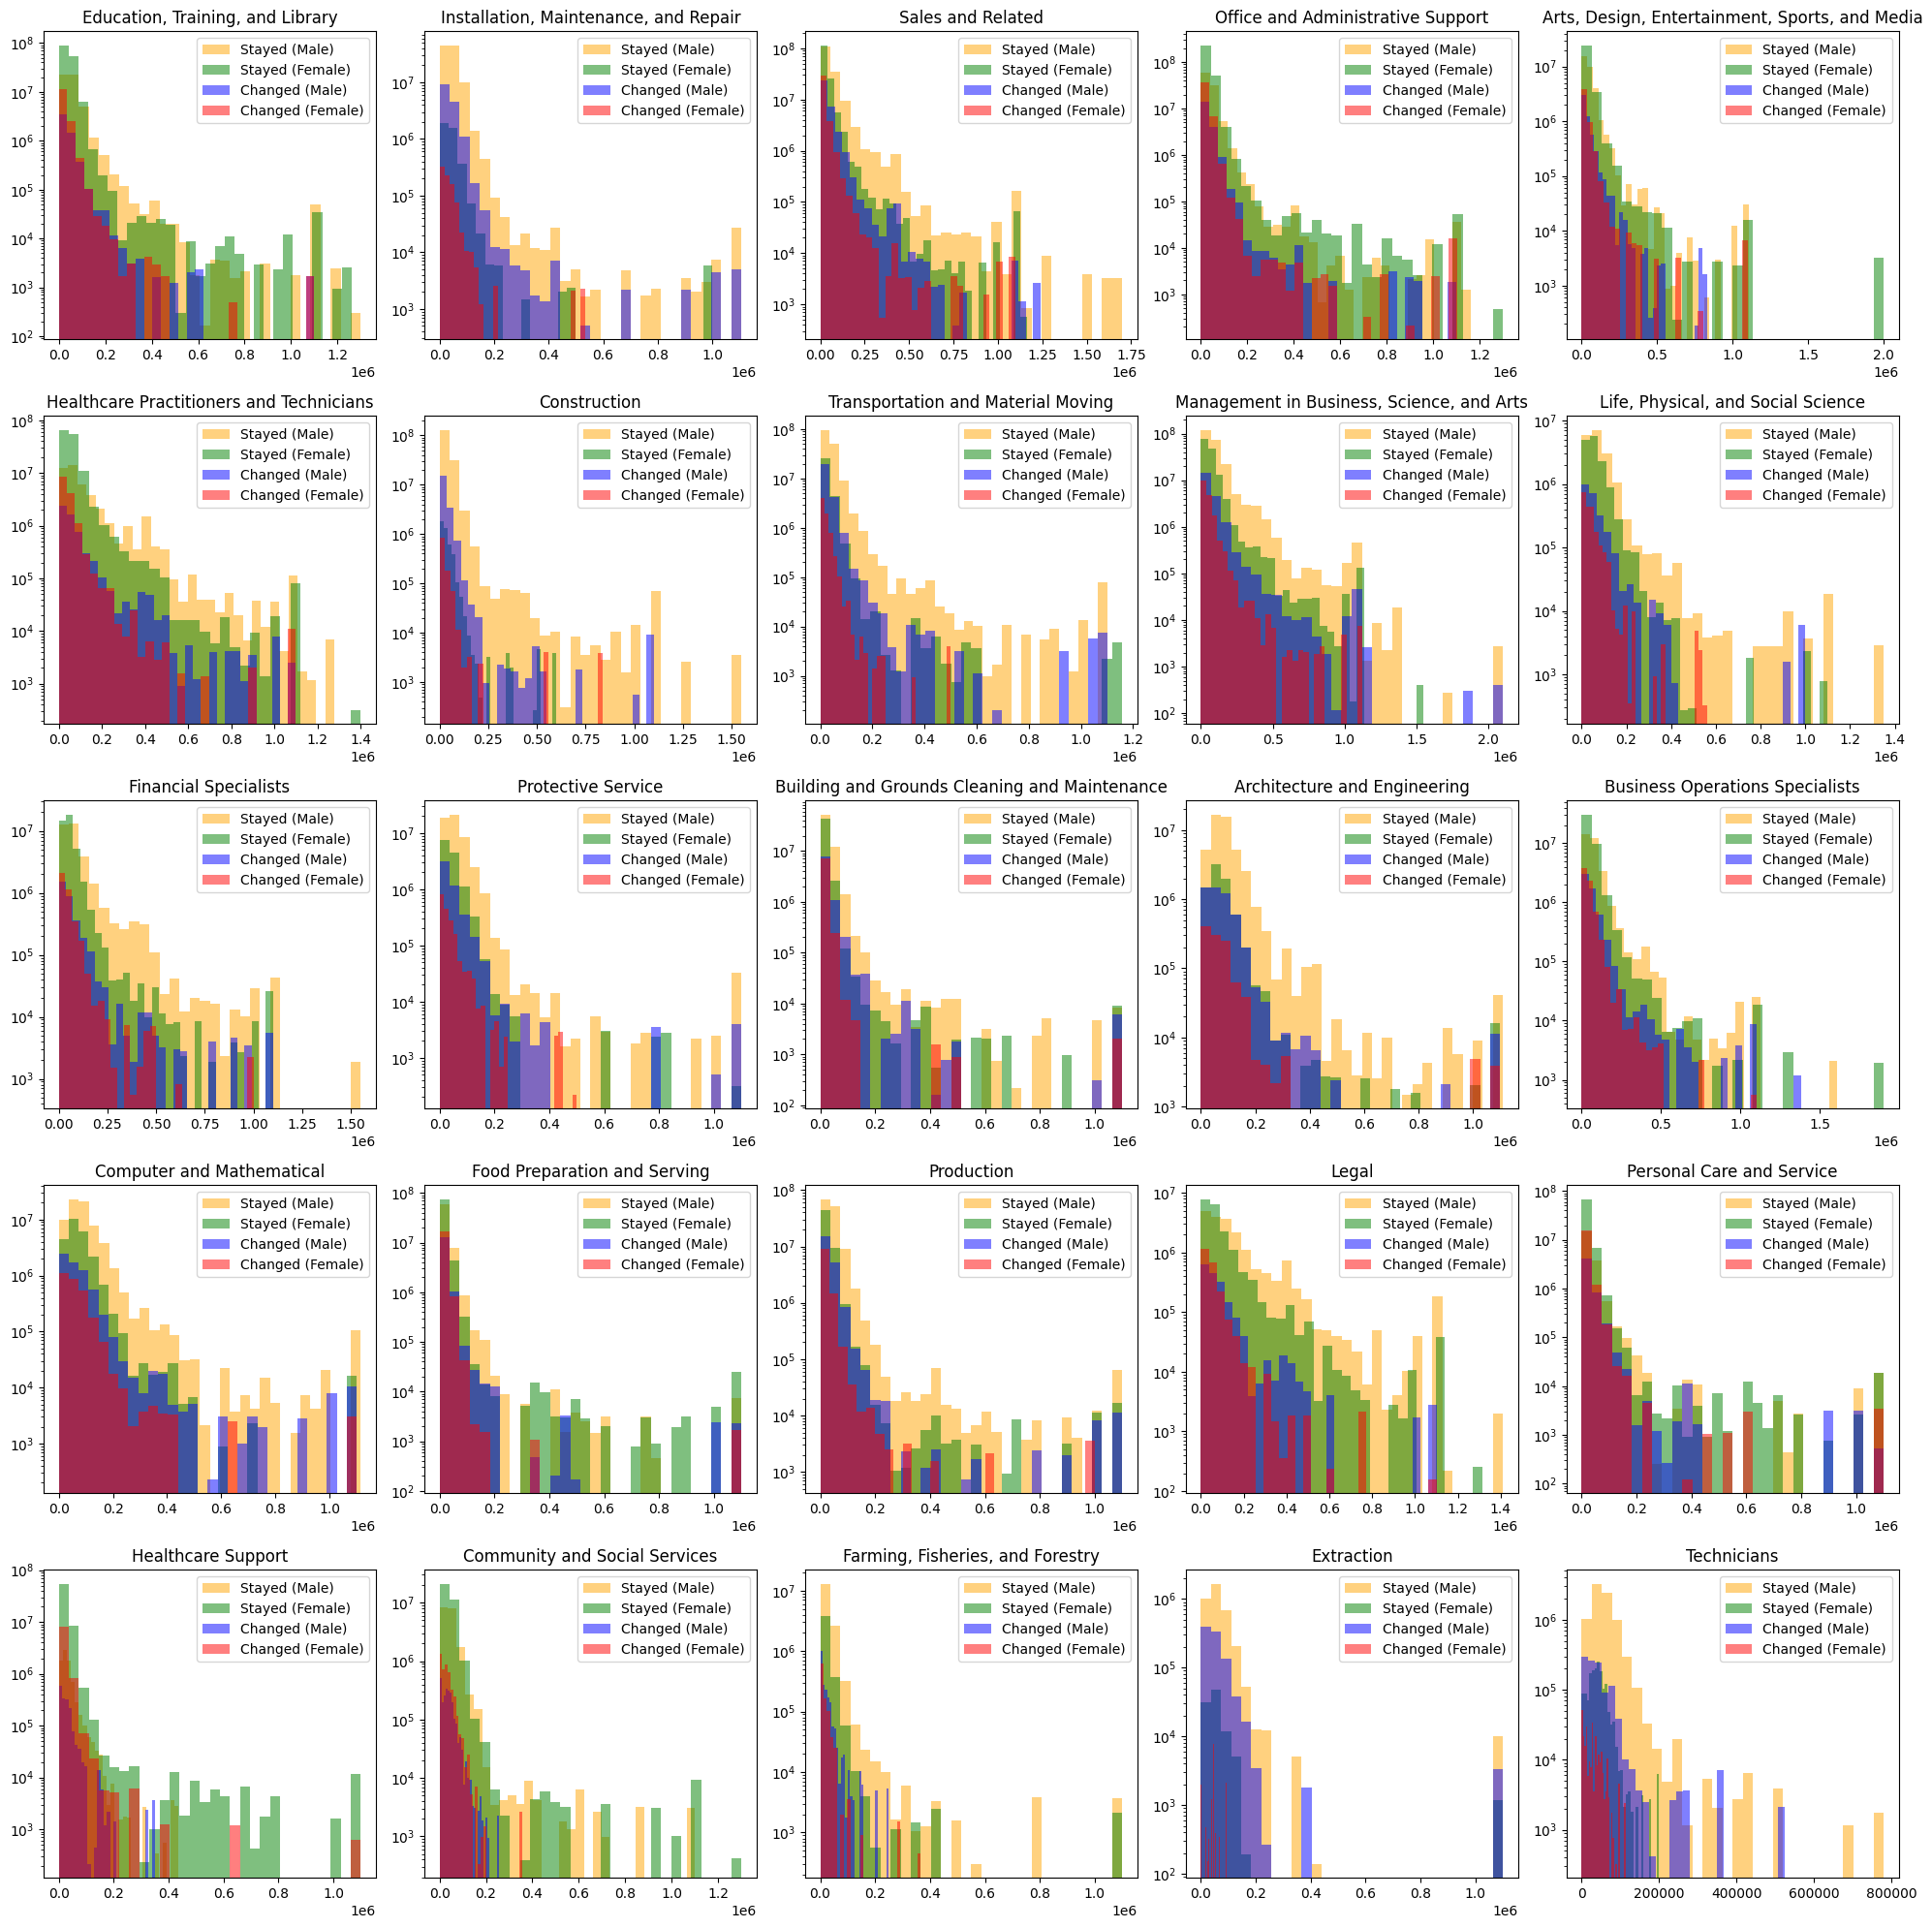

In [ ]:
# Get unique occupation fields
occupation_fields = df['OCC_FIELD'].unique()

# Create a 5x5 grid of subplots
fig, axs = plt.subplots(5, 5, figsize=(20, 20))

# Flatten the axs array for easy iteration
axs = axs.flatten()

# Iterate through each occupation field
for i, occ_field in enumerate(occupation_fields):
    # Filter data for the current occupation field
    occ_data = df[df['OCC_FIELD'] == occ_field]

    # Filter data for males and females who stayed or changed occupations
    stayed_male = occ_data[(occ_data['ChangeOcc'] == 0) & (occ_data['SEX'] == 1)]
    stayed_female = occ_data[(occ_data['ChangeOcc'] == 0) & (occ_data['SEX'] == 2)]
    changed_male = occ_data[(occ_data['ChangeOcc'] == 1) & (occ_data['SEX'] == 1)]
    changed_female = occ_data[(occ_data['ChangeOcc'] == 1) & (occ_data['SEX'] == 2)]

    # Plot histograms for income distribution by occupation change and gender
    axs[i].hist(stayed_male['INCWAGE'], bins=30, weights=stayed_male['WEIGHT'], alpha=0.5, color='orange', label='Stayed (Male)', log=True)
    axs[i].hist(stayed_female['INCWAGE'], bins=30, weights=stayed_female['WEIGHT'], alpha=0.5, color='green', label='Stayed (Female)', log=True)
    axs[i].hist(changed_male['INCWAGE'], bins=30, weights=changed_male['WEIGHT'], alpha=0.5, color='blue', label='Changed (Male)', log=True)
    axs[i].hist(changed_female['INCWAGE'], bins=30, weights=changed_female['WEIGHT'], alpha=0.5, color='red', label='Changed (Female)', log=True)

    # Set title for the subplot
    axs[i].set_title(f'{occ_field}')

    # Add legend for the subplot
    axs[i].legend()

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


In [ ]:
# Filter the dataset for individuals who changed their occupation
changed_occupation = df[df['ChangeOcc'] == 1]
occupation_change_by_gender = changed_occupation.groupby(['SEX_Label', 'OCC_FIELD', 'OCC_FIELD_LY']).size().unstack(fill_value=0)

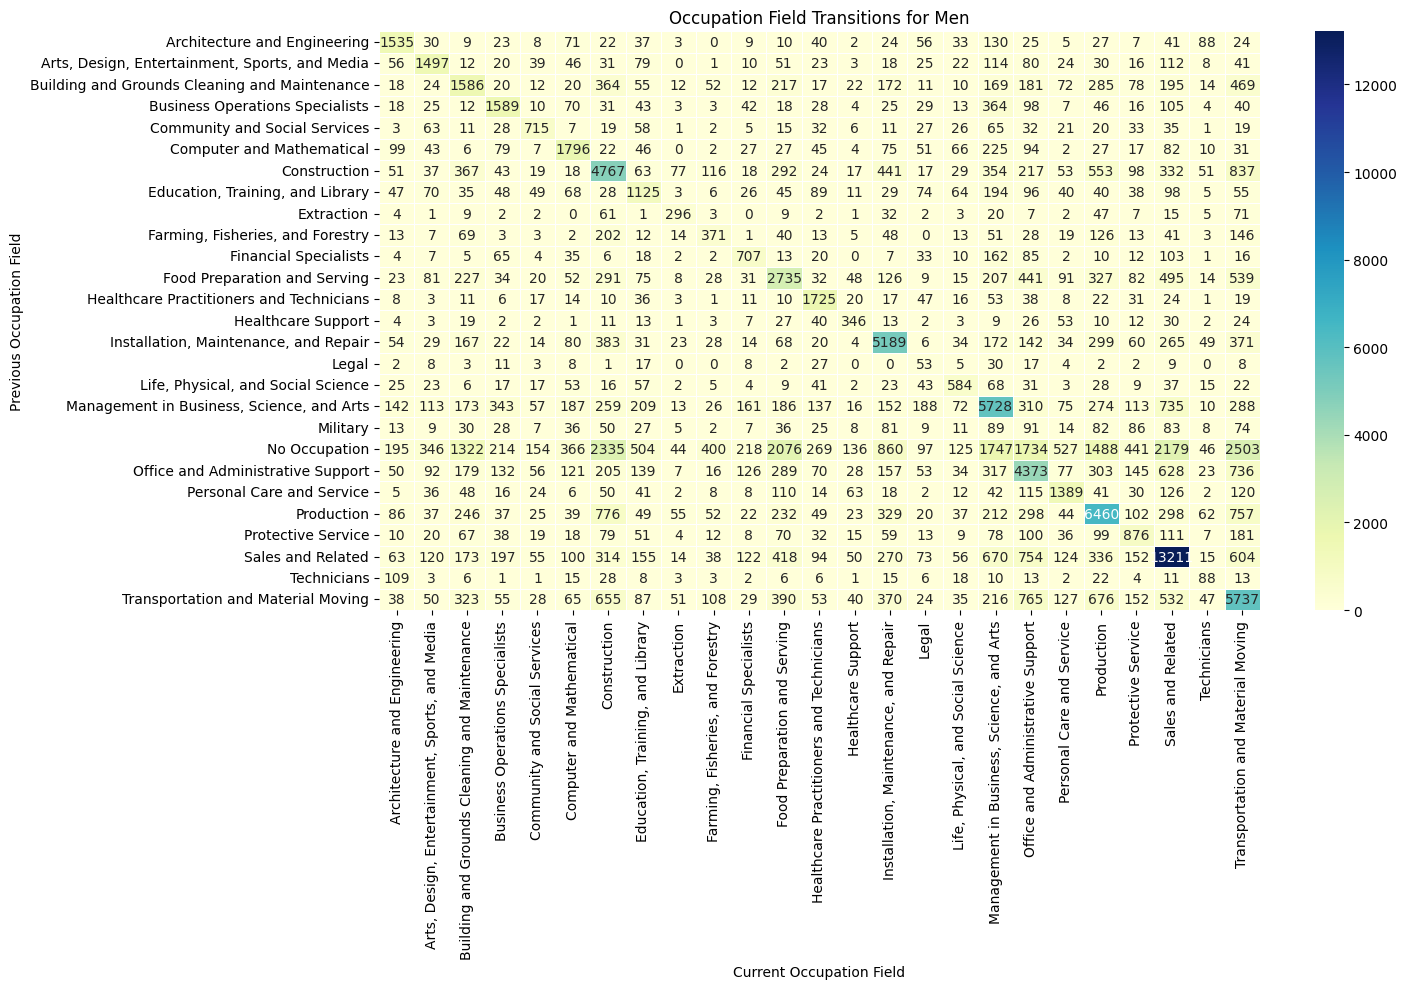

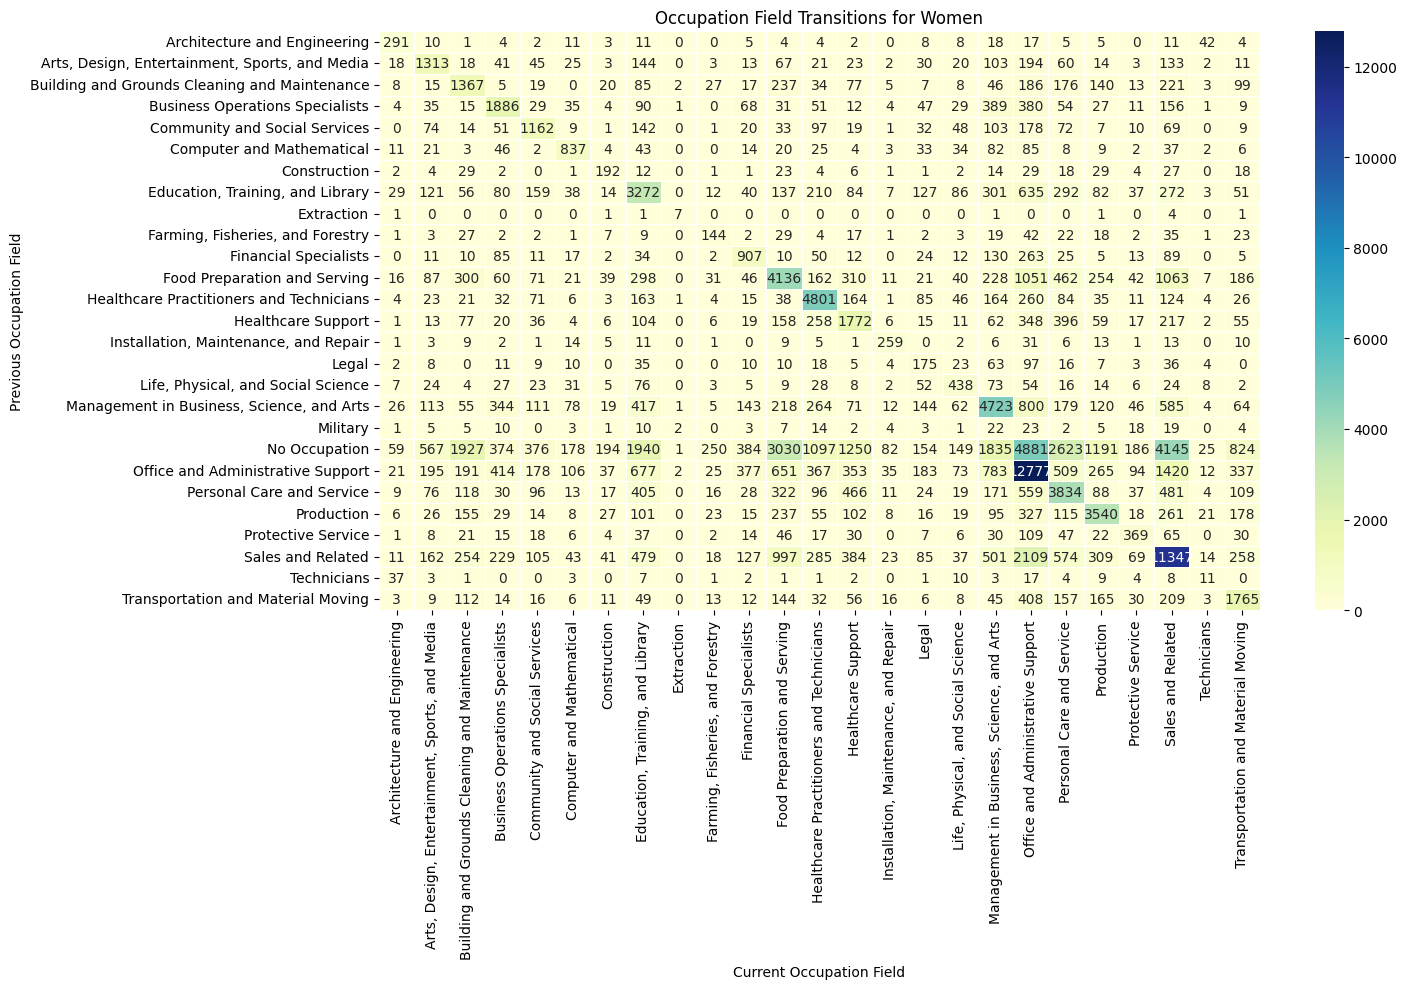

In [ ]:
# Plot heatmap for men
plt.figure(figsize=(15, 10))
sns.heatmap(occupation_change_by_gender.loc['Male'].T, cmap='YlGnBu', annot=True, fmt='d', linewidths=0.5)
plt.title('Occupation Field Transitions for Men')
plt.xlabel('Current Occupation Field')
plt.ylabel('Previous Occupation Field')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Plot heatmap for women
plt.figure(figsize=(15, 10))
sns.heatmap(occupation_change_by_gender.loc['Female'].T, cmap='YlGnBu', annot=True, fmt='d', linewidths=0.5)
plt.title('Occupation Field Transitions for Women')
plt.xlabel('Current Occupation Field')
plt.ylabel('Previous Occupation Field')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


# Network Data

In [ ]:
# Filter dataset for men and women who changed their occupation
changed_occupation_men = df[(df['ChangeOcc'] == 1) & (df['SEX'] == 1)]
changed_occupation_women = df[(df['ChangeOcc'] == 1) & (df['SEX'] == 2)]

## Occupation Mobility

In [ ]:
def calculate_weighted_avg_income(data):
    weighted_avg_incomes = {}
    for index, row in data.iterrows():
        if row['OCC10LY'] not in weighted_avg_incomes:
            occupation_data = data[data['OCC10LY'] == row['OCC10LY']]
            weighted_avg_income = (occupation_data['INCWAGE'] * occupation_data['WEIGHT']).sum() / occupation_data['WEIGHT'].sum()
            weighted_avg_incomes[row['OCC10LY']] = weighted_avg_income
    return weighted_avg_incomes

# Calculate weighted average income for each occupation field for men and women
weighted_avg_income_men = calculate_weighted_avg_income(df[(df['SEX'] == 1)])
weighted_avg_income_women = calculate_weighted_avg_income(df[(df['SEX'] == 2)])

In [ ]:
# Extract relevant columns for edge list
edges_men = changed_occupation_men[['OCC10LY', 'OCC2010', 'WEIGHT']].copy()
edges_women = changed_occupation_women[['OCC10LY', 'OCC2010', 'WEIGHT']].copy()

# Rename columns to match edge list format
edges_men.columns = ['Source', 'Target', 'Weight']
edges_women.columns = ['Source', 'Target', 'Weight']

# Merge edges
edges_men = edges_men.groupby(['Source', 'Target']).agg({'Weight': 'sum'}).reset_index()
edges_women = edges_women.groupby(['Source', 'Target']).agg({'Weight': 'sum'}).reset_index()

In [ ]:
# Function to calculate income difference and its sign
def calculate_income_difference(edges, income_dict):
    # Add income information for target and source occupations
    edges['Income_target'] = edges['Target'].map(income_dict)
    edges['Income_source'] = edges['Source'].map(income_dict)

    # Calculate income difference
    edges['income_difference'] = edges['Income_target'] - edges['Income_source']

    # Round income difference
    edges['income_difference'] = edges['income_difference'].round()

    # Categorize income difference
    edges['income_change'] = edges['income_difference'].apply(lambda x: 'Increase' if x > 3000 else ('Decrease' if x < -3000 else 'No Change'))

    return edges

# Calculate income difference and its sign for men
edges_men = calculate_income_difference(edges_men, weighted_avg_income_men)

# Calculate income difference and its sign for women
edges_women = calculate_income_difference(edges_women, weighted_avg_income_women)

In [ ]:
# Save edge lists to CSV files
edges_men.to_csv('IntermediaryResults/network/occ_edges_men.csv', index=False)
edges_women.to_csv('IntermediaryResults/network/occ_edges_women.csv', index=False)

In [ ]:
# Extract unique OCC10LY values
unique_occ_values = df['OCC10LY'].unique()

# Create node list DataFrame
node_list = pd.DataFrame({'id': unique_occ_values})

# Merge with OCC2010 labels to get node labels
node_list = node_list.merge(occ2010_labels, left_on='id', right_on='Code', how='left')

# Drop Code column
node_list.drop(columns=['Code'], inplace=True)

# Rename columns
node_list.columns = ['id', 'label']

# Add a new column occ_field
node_list['occ_field'] = node_list['id'].apply(map_occupation_field)

nodes_men = node_list.copy()
nodes_women = node_list.copy()

# Add weighted average income to the node list
nodes_men['weighted_avg_income'] = nodes_men['id'].map(weighted_avg_income_men)
nodes_women['weighted_avg_income']= nodes_women['id'].map(weighted_avg_income_women)

# Save edge lists to CSV files
nodes_men.to_csv('IntermediaryResults/network/occ_nodes_men.csv', index=False)
nodes_women.to_csv('IntermediaryResults/network/occ_nodes_women.csv', index=False)

## Occupational Field Mobility

In [ ]:
def calculate_weighted_avg_income(data):
    weighted_avg_incomes = {}
    for index, row in data.iterrows():
        if row['OCC_FIELD_LY'] not in weighted_avg_incomes:
            occupation_data = data[data['OCC_FIELD_LY'] == row['OCC_FIELD_LY']]
            weighted_avg_income = (occupation_data['INCWAGE'] * occupation_data['WEIGHT']).sum() / occupation_data['WEIGHT'].sum()
            weighted_avg_incomes[row['OCC_FIELD_LY']] = weighted_avg_income
    return weighted_avg_incomes

# Calculate weighted average income for each occupation field for men and women
weighted_avg_income_men = calculate_weighted_avg_income(df[(df['SEX'] == 1)])
weighted_avg_income_women = calculate_weighted_avg_income(df[(df['SEX'] == 2)])

In [ ]:
# Extract relevant columns for edge list
edges_men = changed_occupation_men[['OCC_FIELD_LY', 'OCC_FIELD', 'WEIGHT']].copy()
edges_women = changed_occupation_women[['OCC_FIELD_LY', 'OCC_FIELD', 'WEIGHT']].copy()

# Rename columns to match edge list format
edges_men.columns = ['Source', 'Target', 'Weight']
edges_women.columns = ['Source', 'Target', 'Weight']

In [ ]:
# Merge edges
edges_men = edges_men.groupby(['Source', 'Target']).agg({'Weight': 'sum'}).reset_index()
edges_women = edges_women.groupby(['Source', 'Target']).agg({'Weight': 'sum'}).reset_index()

In [ ]:
# Calculate income difference and its sign for men
edges_men = calculate_income_difference(edges_men, weighted_avg_income_men)

# Calculate income difference and its sign for women
edges_women = calculate_income_difference(edges_women, weighted_avg_income_women)

# Save edge lists to CSV files
edges_men.to_csv('IntermediaryResults/network/occ_field_edges_men.csv', index=False)
edges_women.to_csv('IntermediaryResults/network/occ_field_edges_women.csv', index=False)

In [ ]:
# Extract unique OCC10LY values
unique_occ_values = df['OCC_FIELD_LY'].unique()

# Create node list DataFrame
node_list = pd.DataFrame({'id': unique_occ_values})

nodes_men = node_list.copy()
nodes_women = node_list.copy()

# Add weighted average income to the node list
nodes_men['weighted_avg_income'] = nodes_men['id'].map(weighted_avg_income_men)
nodes_women['weighted_avg_income']= nodes_women['id'].map(weighted_avg_income_women)

# Save edge lists to CSV files
nodes_men.to_csv('IntermediaryResults/network/occ_field_nodes_men.csv', index=False)
nodes_women.to_csv('IntermediaryResults/network/occ_field_nodes_women.csv', index=False)